# Calculating the Minimum Thickness of a Sapphire Window Fixed At Both Ends 

## Inputs

## Governing Equations - Distributed Load, Fixed at Both Ends
![Alt text](Beam%20Fixed%20at%20Both%20Ends%20-%20Uniform%20Continuous%20Distributed%20Load.PNG)
### Sapphire Material Properties
Yield Strenght: $\sigma = 300MPa$ <br>
Modulus of Elasticity: $E = 400GPa$
### Moment Diagram (Nm)
$$M(x) = -\frac{w}{12}\Bigg(L^2-6x(L-x)\Bigg)$$

### Deflection Diagram
$$y = \frac{1}{EI}\Bigg[-\frac{wL^2x^2}{24}+\frac{wLx^3}{12}-\frac{wx^4}{24}\Bigg]$$
### Factor of Safety
From Yoder 4.2.2 - Nasa's STD-5001 recommends $$SF\geq 3$$
From Yoder 4.2.2 - If subject to pitting/scratching add SF of x2 
$$\therefore SF\geq6$$
$$\therefore \sigma_{SF} = \frac{\sigma}{SF}$$

### Stress
$$I = \frac{1}{12}bh^3$$
$$\sigma = \frac{My}{I}$$
Stress is maximized when y is maximized. "y" is the distance from the neutral axis to the edge of the window. $$\therefore y=h/2$$
Where h = window thickness
Solving for Window Thickness: $$h = \sqrt[2]{\frac{6M}{b\sigma_{SF}}}$$

### Weibull Failure Probability
Note: The two-parameter Weibull distribution is extremely conservative at small values of failure probability $P_f$ ≤ $10^{−3}$ which are required for optical systems.
Assume that the desired minimum probability of failure is 1000 in 1,000,000 or $$P_f=0.001$$
From Yoder Table 3.3: $$Weibull Modulus: m = 4.1$$ $$Scale Factor: \sigma_0 = 600MPa$$ $$Test Area: A_0 = 100mm^2$$
Non-modified
$$P_f = 1-exp\Bigg(-\frac{\sigma}{\sigma_0}\Bigg)^m$$
Modified to Scale with Area
$$P_f = 1 - exp\Bigg[-\frac{A}{A_0}\Bigg(\frac{\sigma}{\sigma_0}\Bigg)^m\Bigg]$$



In [107]:
L = 0.05 #Unsupported Width (m)
F = -500 #Max Applied Load(N) -> Based on what a human would exert on the sapphire window when cleaning
w = F/L #Distributed Load(N/m) -> Load per meter across the L span of the window
b = 0.1 #Length of window (Long edge) (m)
E = 400000000000 #Modulus of Elasticity (Pa)
sigma = 300000000 #Yeild Strength (Pa)
m = 4.1 #Weibull Modulus
sigma_0 = 600000000 #Weibull Scale Factor
sf = 12 #Factor fo Safety
A = L*b #Real Area (m2)
A_0 = 0.0001 #Test Area (m2)

# Bending Moment

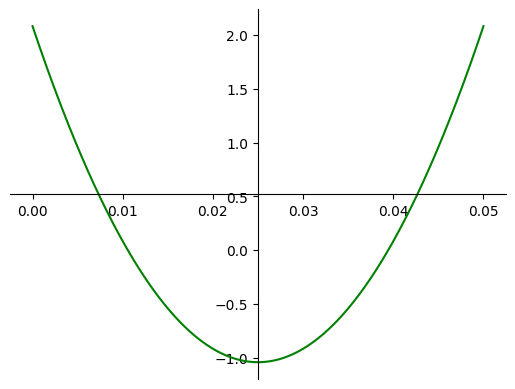

The maximum Bending Moment is: 2.0 Nm


In [108]:
import matplotlib.pyplot as plt
import numpy as np

# 100 linearly spaced numbers
x = np.linspace(0,L,500)

# the function, See "Moment Diagram"
M = -(w/12)*((L**2)-6*x*(L-x))

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#print(x)

# plot the function
plt.plot(x,M, 'g')

#print(y)
# show the plot
plt.show()

print("The maximum Bending Moment is:",np.around(max(M,key=abs),decimals=0),"Nm")

# Minimum Window Thickness

In [109]:
import math

maxM = max(M,key=abs)
#print(type(maxM))

sigma_SF = sigma/sf
#print(sigma_SF)

h_min = np.sqrt((6*maxM)/(b*sigma_SF)) #in meters
print("The window must be at least:", np.around(h_min*1000, decimals=2),"mm thick")

#probabilty of Failure
Pf = 1 - np.exp(-(A/A_0)*(np.power((sigma_SF/sigma_0),m)))
print("The probability of failure is 1 failure per", np.around(1/Pf, decimals=0),"units")

The window must be at least: 2.24 mm thick
The probability of failure is 1 failure per 9118.0 units


# Compare with Solidworks Simulation

Thickness = 2.25mm
<br>
Load = 500N equally distributed

Hand Calculated FOS = 12
Simlulation FOS = 11 with a Columbus-Mohr criteria

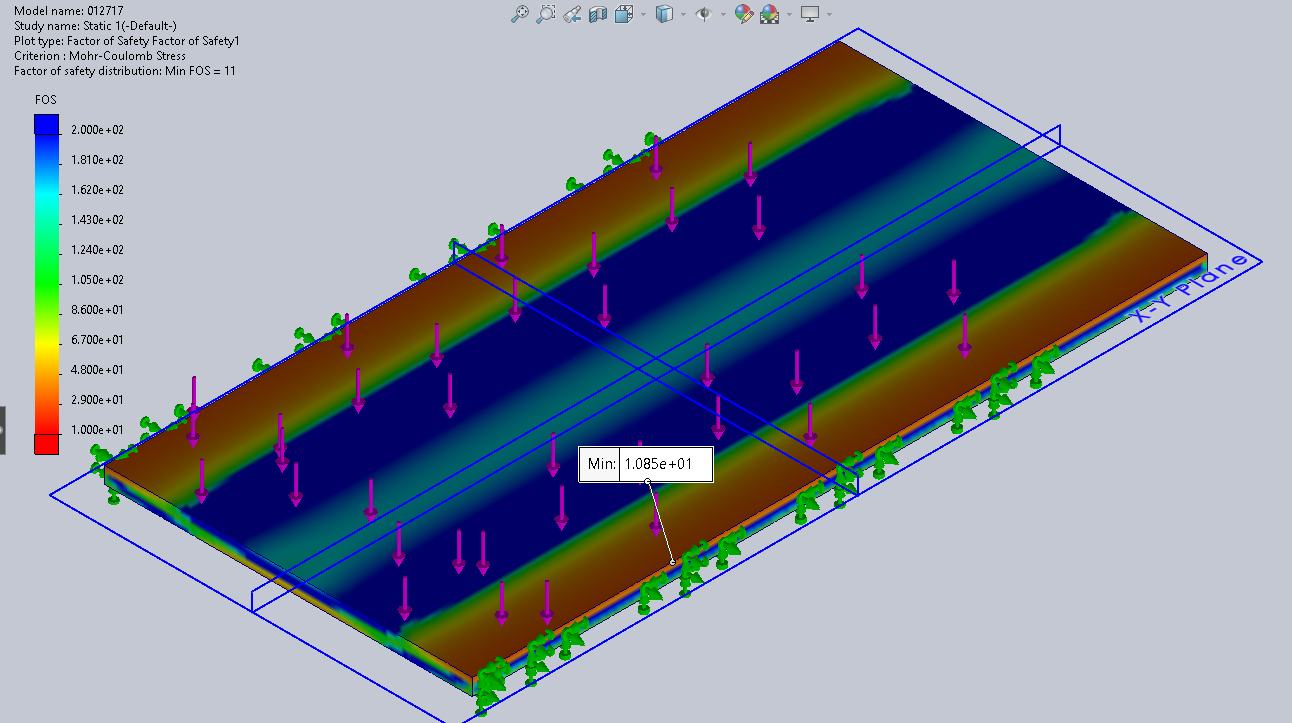